In [1]:
from dynamics import base, creator, model
from dynamics.model import Asset
from dynamics.tools import Body, kinectic, potentialGrav, rotation, solution
from dynamics.tools.solver import euler, improved_euler

In [2]:
simulation = base.Simulation()

body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0, 'length':1})
sol = solution.Solution(disp_0=3.0, velo_0=0)
asset = Asset(**{'name': 'mass', 'var_name': 'theta', 'component': body, 'motion_func': rotation, 'solution': sol})

simulation.register('model', model.Model(asset))
simulation.register('solver', euler)

In [3]:
simulation.model.acceleration()

-thetaddot(t) - 9.80665*sin(theta(t))

In [4]:
simulation.set_paramters(time_step=0.3e-3, time_end=5)
simulation.run()

100%|██████████| 16666/16666 [00:22<00:00, 756.12it/s]


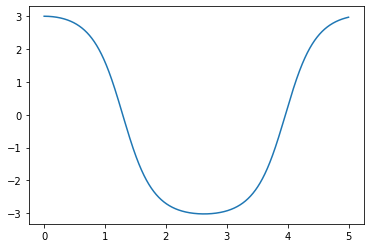

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
solu = simulation.results
plt.plot(solu.time, solu.displacement)
plt.show()

In [5]:
simulation.results.clear()

In [1]:
from dynamics.model import Asset
a = Asset()

NameError: name 'Body' is not defined